In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys

sys.path.append('../modules/')

import funAdapt as fa

import pandas as pd

In [3]:
def load_from_mathematica(filename):
    db = pd.read_csv(filename, header = None)
    db = db.map(lambda x: str(x))
    db = db.map(lambda x: x.strip('{}'))

    db = db.map(lambda x: x.replace('*^', 'e'))

    db = db.map(lambda x: float(x))
    return db.values.T

def load_countour_from_mathematica(filename):
    x, y, vals = load_from_mathematica(filename)
    xvals = np.unique(x)
    yvals = np.unique(y)

    mat = np.zeros((len(xvals), len(yvals)))

    for i, xval in enumerate(xvals):
        mat[i] = vals[x == xval]

    return xvals, yvals, mat

In [4]:
sys.path.append('../../lib/')
import funPlots as fplot

import cmasher

fplot.master_format(ncols = 2, nrows = 1)

In [5]:
sigma_Iyeta_axy, Iyeta_axy = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta5_(x_Sigma)_(y_IyEta_axyPart).txt')
sigma_Iyeta_ayeta, Iyeta_ayeta = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta5_(x_Sigma)_(y_IyEta_ayeta).txt')

sigma_Sdot_axy, Sdot_axy = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta5_(x_Sigma)_(y_Sdotmin_axyPart).txt')
sigma_Sdot_ayeta, Sdot_ayeta = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta5_(x_Sigma)_(y_Sdotmin_ayEta).txt')

varIyeta_axy = 1 - np.exp(-2*Iyeta_axy)
varIyeta_ayeta = 1 - np.exp(-2*Iyeta_ayeta)

In [6]:
# sigma_Iyeta_axy_te1, Iyeta_axy_te1 = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta2_(x_Sigma)_(y_IyEta_axyPart).txt')
# sigma_Iyeta_ayeta_te1, Iyeta_ayeta_te1 = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta2_(x_Sigma)_(y_IyEta_ayeta).txt')
# sigma_Iyeta_axy_te2, Iyeta_axy_te2 = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta10_(x_Sigma)_(y_IyEta_axyPart).txt')
# sigma_Iyeta_ayeta_te2, Iyeta_ayeta_te2 = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta10_(x_Sigma)_(y_IyEta_ayeta).txt')

# sigma_Sdot_axy_te1, Sdot_axy_te1 = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta2_(x_Sigma)_(y_Sdotmin_axyPart).txt')
# sigma_Sdot_ayeta_te1, Sdot_ayeta_te1 = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta2_(x_Sigma)_(y_Sdotmin_ayEta).txt')
# sigma_Sdot_axy_te2, Sdot_axy_te2 = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta10_(x_Sigma)_(y_Sdotmin_axyPart).txt')
# sigma_Sdot_ayeta_te2, Sdot_ayeta_te2 = load_from_mathematica('../data/mathematica/Fig2_Lambda0.9_ThetaEta10_(x_Sigma)_(y_Sdotmin_ayEta).txt')

# varIyeta_axy_te1 = 1 - np.exp(-2*Iyeta_axy_te1)
# varIyeta_ayeta_te1 = 1 - np.exp(-2*Iyeta_ayeta_te1)
# varIyeta_axy_te2 = 1 - np.exp(-2*Iyeta_axy_te2)
# varIyeta_ayeta_te2 = 1 - np.exp(-2*Iyeta_ayeta_te2)

In [141]:
theta_eta_cont_yeta, sigma_cont_yeta, Iyeta_cont_yeta = load_countour_from_mathematica('../data/mathematica/Fig2_Lambda0.9_(x_ThetaEta)_(y_Sigma)_(z_IyEta_ayEta).txt')
theta_eta_cont_axy, sigma_cont_axy, Iyeta_cont_axy = load_countour_from_mathematica('../data/mathematica/Fig2_Lambda0.9_(x_ThetaEta)_(y_Sigma)_(z_IyEta_axyPart).txt')

theta_eta_cont_astar, sigma_cont_astar, astar_cont = load_countour_from_mathematica('../data/mathematica/Fig2_Lambda0.9_(x_ThetaEta)_(y_Sigma)_(z_ayEta).txt')
theta_eta_cont_aeff, sigma_cont_aeff, aeff_cont = load_countour_from_mathematica('../data/mathematica/Fig2_Lambda0.9_(x_ThetaEta)_(y_Sigma)_(z_axyPart).txt')

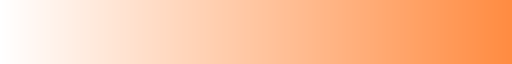

In [142]:
from matplotlib.colors import LinearSegmentedColormap
c1 = '#ff8c42'
c2 = '#0f4c5c'

colors = ["w", "#F6FBE4", "#ECF6C9", "#E3F2AE", "#d9ed92", "#b5e48c", "#99d98c",
          "#76c893", "#52b69a", "#34a0a4", "#168aad", "#1a759f", "#1e6091", "#184e77"]
nodes = np.linspace(0, 1, len(colors))
cmap_PD = LinearSegmentedColormap.from_list("cmap_SR", list(zip(nodes, colors)))

cmap_opt = fplot.white_to_color(c2)
cmap_eff = fplot.white_to_color(c1)
cmap_eff

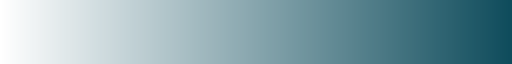

In [143]:
cmap_opt

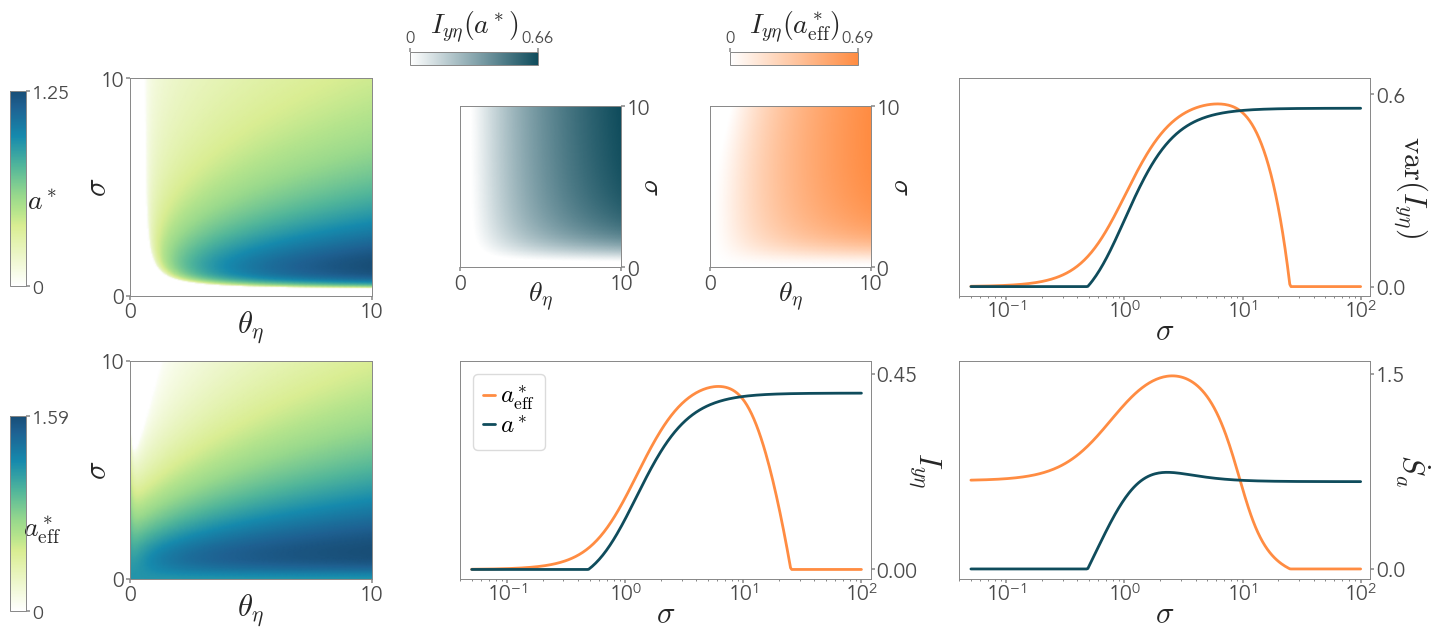

In [153]:
fig, axs = plt.subplot_mosaic([["c1", 'i1', 'i2', "p3", "p3"],
                               ["c2", 'p1', 'p1', "p2", "p2"]], figsize=(16, 6.5),
                               gridspec_kw = {'width_ratios': [1.5, 1, 1, 1, 1]})
plt.subplots_adjust(wspace = 0.5, hspace = 0.3)

axs["i1"].set_aspect(1)
axs["i2"].set_aspect(1)

for aa in [axs["p1"], axs["p2"], axs["p3"]]:
    aa.set_xlim(4e-2, 1.2e2)
    aa.set_xscale('log')
    aa.set_xlabel(r'$\sigma$', fontsize = 22, labelpad = -5)
    fplot.right_ylabel(aa)


axs["p1"].plot(sigma_Iyeta_axy[sigma_Iyeta_axy > 5e-2], Iyeta_axy[sigma_Iyeta_axy > 5e-2],
               label = r'$a^*_{\rm eff}$', color = c1, lw = 2)
axs["p1"].plot(sigma_Iyeta_ayeta[sigma_Iyeta_ayeta > 5e-2], Iyeta_ayeta[sigma_Iyeta_ayeta > 5e-2],
               label = r'$a^*$', color = c2, lw = 2)

axs["p1"].legend(loc = 'upper left')
axs["p1"].set_ylabel(r'$I_{y \eta}$', rotation = -90, fontsize = 22, labelpad = 18)
axs["p1"].set_yticks([0, 0.45])
axs["p1"].set_ylim(axs["p1"].get_ylim()[0], 0.48)

axs["p2"].plot(sigma_Sdot_axy[sigma_Sdot_axy > 5e-2], Sdot_axy[sigma_Sdot_axy > 5e-2],
               label = r'$\dot{S}(a_{\rm eff})$', color = c1, lw = 2)
axs["p2"].plot(sigma_Sdot_ayeta[sigma_Sdot_ayeta > 5e-2], Sdot_ayeta[sigma_Sdot_ayeta > 5e-2],
               label = r'$\dot{S}(a_{\rm opt})$', color = c2, lw = 2)

axs["p2"].set_ylabel(r'$\dot{S}_{a}$', rotation = -90, fontsize = 22, labelpad = 18)
axs["p2"].set_yticks([0, 1.5])
axs["p2"].set_ylim(axs["p2"].get_ylim()[0], 1.6)

axs["p3"].plot(sigma_Iyeta_axy[sigma_Iyeta_axy > 5e-2], varIyeta_axy[sigma_Iyeta_axy > 5e-2],
               label = r'$a^*_{\rm eff}$', color = c1, lw = 2)
axs["p3"].plot(sigma_Iyeta_ayeta[sigma_Iyeta_ayeta > 5e-2], varIyeta_ayeta[sigma_Iyeta_ayeta > 5e-2],
               label = r'$a^*$', color = c2, lw = 2)

axs["p3"].set_ylabel(r'${\rm var}(I_{y \eta})$', fontsize = 22, labelpad = 18, rotation = -90)
axs["p3"].set_yticks([0, 0.6])
axs["p3"].set_ylim(axs["p3"].get_ylim()[0], 0.65)

axs["i1"].pcolormesh(theta_eta_cont_yeta, sigma_cont_yeta, Iyeta_cont_yeta.T,
                     cmap = cmap_opt, shading = 'gouraud', rasterized=True)

cbar_ax1 = fig.add_axes([0.3, 0.9, 0.08, 0.02])
cb = fig.colorbar(axs["i1"].collections[0], cax = cbar_ax1, orientation = 'horizontal', )
cb.set_ticks([0, 0.66])
cb.set_ticklabels([0, 0.66])
cb.ax.tick_params(labelsize = 12)
cb.set_label(r'$I_{y \eta}(a^*)$', fontsize = 20, labelpad = -40)
cbar_ax1.xaxis.set_ticks_position("top")


axs["i2"].pcolormesh(theta_eta_cont_axy, sigma_cont_axy, Iyeta_cont_axy.T,
                     cmap = cmap_eff, shading = 'gouraud', rasterized=True)

cbar_ax2 = fig.add_axes([0.5, 0.9, 0.08, 0.02])
cb = fig.colorbar(axs["i2"].collections[0], cax = cbar_ax2, orientation = 'horizontal', )
cb.set_ticks([0, Iyeta_cont_axy.max()])
cb.set_ticklabels([0, round(Iyeta_cont_axy.max(), 2)])
cb.ax.tick_params(labelsize = 12)
cb.set_label(r'$I_{y \eta}(a^*_{\rm eff})$', fontsize = 20, labelpad = -40)
cbar_ax2.xaxis.set_ticks_position("top")

for aa in [axs["i1"], axs["i2"]]:
    aa.set_xticks([0, 10])
    aa.set_yticks([0, 10])
    aa.set_xlabel(r'$\theta_\eta$', fontsize = 20, labelpad = -10)
    aa.set_ylabel(r'$\sigma$', fontsize = 20, labelpad = 10, rotation = -90)
    aa.set_xlim(0, 10)
    aa.set_ylim(0., 10)
    fplot.right_ylabel(aa)

axs["c1"].pcolormesh(theta_eta_cont_astar, sigma_cont_astar, astar_cont.T,
                     cmap = cmap_PD, vmin = 0, rasterized=True, shading = 'gouraud')
cbar_ax3 = fig.add_axes([0.05, 0.56, 0.01, 0.3])
cb = fig.colorbar(axs["c1"].collections[0], cax = cbar_ax3, orientation = 'vertical')
cb.set_ticks([0, astar_cont.max()])
cb.set_ticklabels([0, round(astar_cont.max(), 2)])
cb.ax.tick_params(labelsize = 14)
cb.set_label(r'$a^*$', fontsize = 20, labelpad = -20, rotation = 0)

axs["c2"].pcolormesh(theta_eta_cont_aeff, sigma_cont_aeff, aeff_cont.T,
                     cmap = cmap_PD, vmin = 0, rasterized=True, shading = 'gouraud')
cbar_ax4 = fig.add_axes([0.05, 0.06, 0.01, 0.3])
cb = fig.colorbar(axs["c2"].collections[0], cax = cbar_ax4, orientation = 'vertical')
cb.set_ticks([0, aeff_cont.max()])
cb.set_ticklabels([0, round(aeff_cont.max(), 2)])
cb.ax.tick_params(labelsize = 14)
cb.set_label(r'$a^*_{\rm eff}$', fontsize = 20, labelpad = -20, rotation = 0)


for aa in [axs["c1"], axs["c2"]]:
    aa.set_xticks([0.05, 10])
    aa.set_yticks([0.05, 10])
    aa.set_xticklabels([0, 10])
    aa.set_yticklabels([0, 10])
    aa.set_xlabel(r'$\theta_\eta$', fontsize = 22, labelpad = -10)
    aa.set_ylabel(r'$\sigma$', fontsize = 22, labelpad = -10)

plt.savefig("../figures/figure2_draft.svg", bbox_inches = "tight")

plt.show()